# THE SPARKS FOUNDATION

# TASK 2 - PREDICTION USING UNSUPERVISED ML

# MADE BY: UJJWAL AGGARWAL

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset

data = pd.read_csv("C:\\Users\\Ujjawal\\Downloads\\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dimensions

data.shape

(150, 6)

In [5]:
# Getting some info of our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Statistical description

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Removing 'Id' column
data.drop('Id', axis=1, inplace=True)

In [9]:
data.shape

(150, 5)

In [10]:
# Checking for any missing value in our dataset

data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# Checking value counts of our dependent variable

data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Splitting dataset into target and training data

# target data- It will include Dependent Variable only
# training data- It will include all variables except our Dependent Variable

In [12]:
target_data = data.iloc[:,4]
target_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [13]:
training_data = data.iloc[:,[0,1,2,3]]
training_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Visualizing some of the data, we'll be working on.

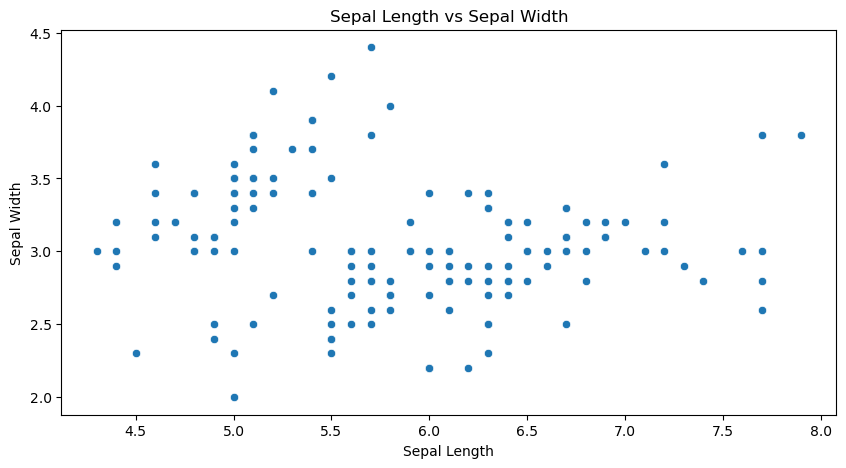

In [14]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=data)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Sepal Length vs Sepal Width")
plt.show()

In [15]:
# Determining no. of clusters required using Elbow Method

from sklearn.cluster import KMeans

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(training_data)
    wcss.append(kmeans.inertia_)
np.array(wcss)

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        46.53558205,  38.93873974,  34.19846462,  29.8891789 ,
        28.33757862,  26.58732552])

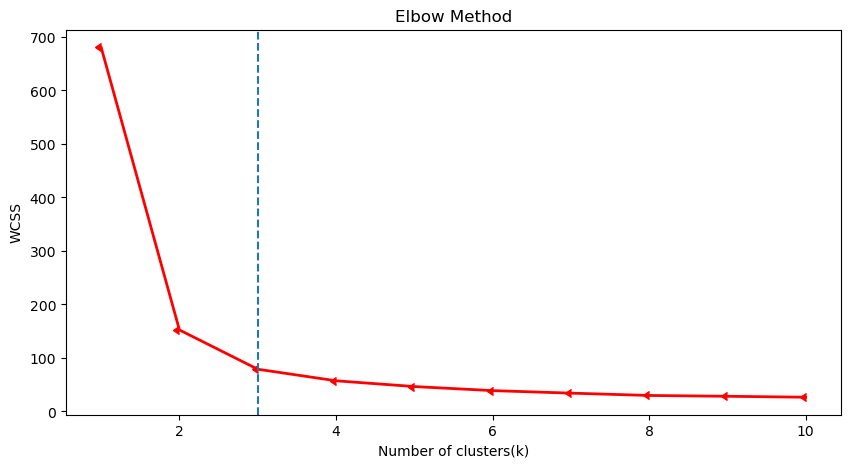

In [18]:
# Visualizing Elbow Method to determine number of optimal clusters for our dataset

plt.figure(figsize=(10,5))
ax = plt.plot(range(1,11), wcss, linewidth=2, color="red", marker=8)
plt.axvline(x=3, ls='--')
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [19]:
# Clustering dataset with 3 clusters

kmm = KMeans(n_clusters=3, random_state=2410).fit(training_data)

In [20]:
# let's check how the clusters are formed

kmm.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
# Let's combine cluster data points with our original dataset

df = pd.concat([data, pd.Series(kmm.labels_)], axis=1).rename(columns={0:"cluster"})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [22]:
# Checking our cluster size

df["cluster"].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

In [23]:
# Now, let's check on what basis clusters are made

cluster_profile = df.groupby(["cluster"]).mean()
cluster_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


In [24]:
# Determining centroids of the dataset

kmm.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

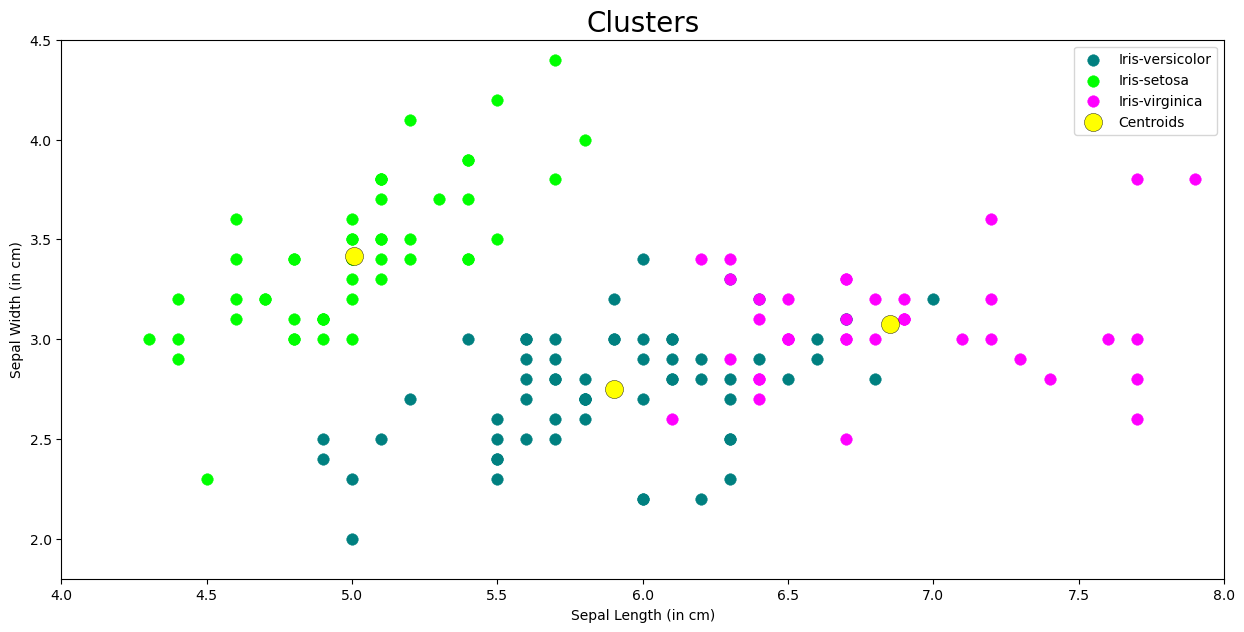

In [25]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=df[df['cluster'] == 0]['SepalLengthCm'],
            y=df[df['cluster'] == 0]['SepalWidthCm'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=df[df['cluster'] == 1]['SepalLengthCm'],
            y=df[df['cluster'] == 1]['SepalWidthCm'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=df[df['cluster'] == 2]['SepalLengthCm'],
            y=df[df['cluster'] == 2]['SepalWidthCm'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kmm.cluster_centers_[:, 0], y=kmm.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

In [26]:
# checking the performance of the model

pd.crosstab(target_data, df['cluster'])

cluster,0,1,2
Species,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36


# Analysis